In [20]:
import pandas as pd

df1 = pd.read_csv("/Users/najjamero/Desktop/fct_invoice.csv")

df1

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [21]:
df2 = pd.read_json("/Users/najjamero/Desktop/dim_customer.json")

df2

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [22]:
# Easy 1. How many unique customers are in the dataset?

unique_customers = df2["id"].nunique()

print("There are " + str(unique_customers) + " customers in the dataset.")

There are 5191 customers in the dataset.


In [23]:
# Easy 2. What are the different categories of products available? How many unique categories are there?

categories = df1["category"].unique()
num_categories = df1["category"].nunique()

print("There are " + str(categories) + ", making it a total of " + str(num_categories) + " categories in the dataset.")

There are ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir'], making it a total of 8 categories in the dataset.


In [26]:
# Easy 3. Which payment method is the most popular? How many times was it used?

num_popular_pm = df1["payment_method"].value_counts()
popular_pm = num_popular_pm.idxmax()
count_num_popular_pm = num_popular_pm.loc[popular_pm]

print("Most popular payment method:", popular_pm)
print("Number of times used:", count_num_popular_pm)

Most popular payment method: Cash
Number of times used: 44447


In [41]:
# Medium 1. What are the three most popular categories, by total sales?

df1['total_sales'] = df1['quantity'] * df1['price']

category_sales = df1.groupby('category')['total_sales'].sum().sort_values(ascending = False)

top_3_categories = category_sales.head(3)

top_3_categories_df = pd.DataFrame(top_3_categories).reset_index()

top_3_categories_df.columns = ['Category', 'Total Sales']

top_3_categories_df

,Category,Total Sales
0,Clothing,1.139968e+08
1,Shoes,6.655345e+07
2,Technology,5.786235e+07


In [29]:
# Medium 2. What are the total sales attributed to customers over the age of 45?

merged = pd.merge(df1,df2,left_on = "customer_id", right_on = "id")
merged["sales"] = merged["quantity"] * merged["price"]
print("The total sales attributed to customers over the age of 45 is " + str(merged[merged["age"] > 45]["sales"].sum()))

The total sales attributed to customers over the age of 45 is 82039768.15


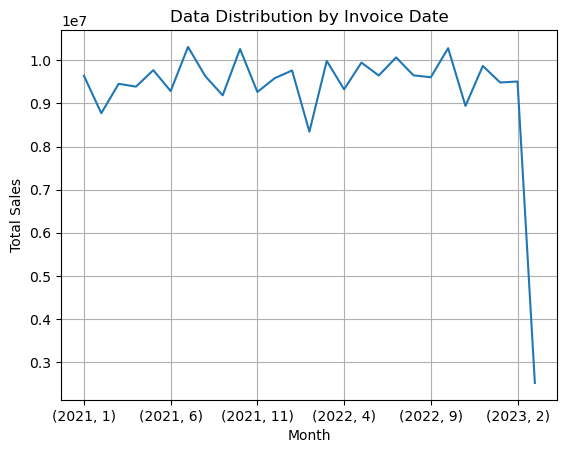

Based on the displayed graph, it can be observed that both 2021 and 2022 share a comparable pattern of fluctuations.
Sales show a recurring pattern of being at their lowest around between November 2021 and April 2022. It is followed by the months between January 2021 and June 2021.
On the other hand, sales reached their peak between June 2021 and November 2021.
However, in 2023, there was a significant and sudden decrease in sales.


In [30]:
# Medium 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

import pandas as pd
import matplotlib.pyplot as plt

merged["invoice_date"] = pd.to_datetime(merged["invoice_date"], format = "%d/%m/%Y")
merged["year"] = merged["invoice_date"].dt.year
merged["month"] = merged["invoice_date"].dt.month
monthly_sales = merged.groupby(["year", "month"])['sales'].sum()

monthly_sales.plot(kind='line')
plt.title('Data Distribution by Invoice Date')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

print("Based on the displayed graph, it can be observed that both 2021 and 2022 share a comparable pattern of fluctuations.")
print("Sales show a recurring pattern of being at their lowest around between November 2021 and April 2022. It is followed by the months between January 2021 and June 2021.")
print("On the other hand, sales reached their peak between June 2021 and November 2021.")
print("However, in 2023, there was a significant and sudden decrease in sales.")

In [31]:
# Hard 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

merged["range"] = pd.cut(merged["age"], bins = range(10, 91, 10), right = False)
table = pd.pivot_table(merged, index = "range", columns = "category", values = "sales", aggfunc = "sum")
print(table)

category     Books     Clothing  Cosmetics  Food & Beverage       Shoes  \
range                                                                     
[10, 20)  12801.75   1927413.84  109619.36         13582.31   993281.35   
[20, 30)  79461.75  10250732.80  605915.32         73491.96  5924878.24   
[30, 40)  84143.10  11354126.96  723544.70         87246.86  7200839.66   
[40, 50)  87203.40  11215189.92  665034.96         89553.29  7025590.02   
[50, 60)  74962.20  10321851.76  587780.96         72425.04  5852857.84   
[60, 70)  80476.80  10660642.08  649990.76         80976.09  5978893.54   
[70, 80)  54827.85   7769371.28  419082.62         55050.98  4480269.05   
[80, 90)  26664.00   4493698.00  254531.60         31332.93  2628744.60   

category  Souvenir  Technology       Toys  
range                                      
[10, 20)  12375.15   1129800.0   60426.24  
[20, 30)  54943.32   5261550.0  385100.80  
[30, 40)  64092.72   6159300.0  420582.40  
[40, 50)  66391.80   5954550.